In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import zipfile
import os

In [6]:
api = KaggleApi()
api.authenticate()

def kaggle_load_data(data_kaggle):
    api.dataset_download_files(data_kaggle, unzip=True)
    files = [file for file in os.listdir() if file.endswith('.csv')]

    for csv in files:
        data = pd.read_csv(csv)
        return data

data = kaggle_load_data('uciml/mushroom-classification')

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [14]:
num_null = data.isnull().sum()
num_na = data.isna().sum()

print(num_null)
print(num_na)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                 

In [22]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [23]:
data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [68]:
data_p = data[data['class'].eq('p')]
data_e = data[data['class'].eq('e')]

print(len(data_p))
print(len(data_e))



3916
4208


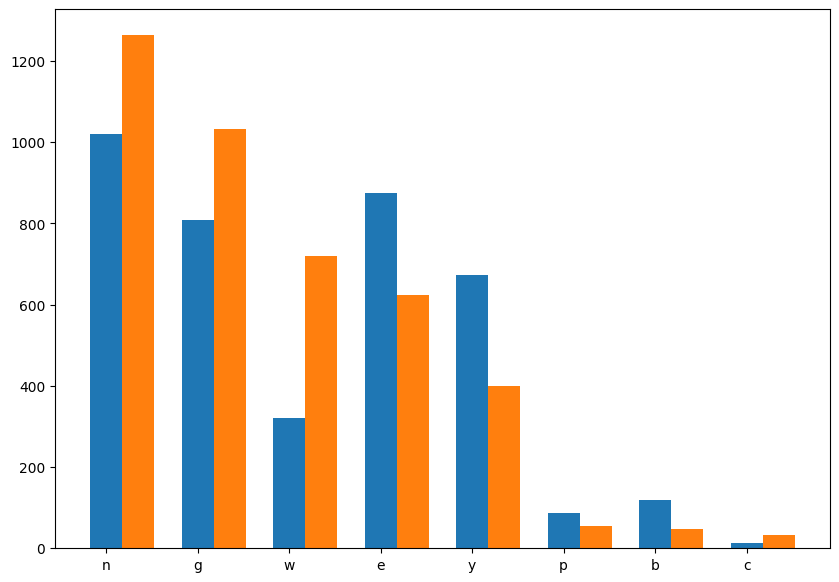

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
     
cap_colors_p = data_p['cap-color'].value_counts()
cap_colors_e = data_e['cap-color'].value_counts()

df_colors = pd.merge(cap_colors_e,cap_colors_p, right_index = True, left_index = True, suffixes=('cap_colors_p', 'cap_colors_e'))
df_colors['total'] = df_colors['countcap_colors_p'] + df_colors['countcap_colors_e']

index = np.arange(len(df_colors.index))
width = 0.35

fig, ax = plt.subplots(figsize=(10,7))

ax.bar(df_colors.index, df_colors['countcap_colors_e'], label='countcap_colors_p', width=width)
ax.bar(index + width, df_colors['countcap_colors_p'], label='countcap_colors_e', width=width)
plt.show()


In [171]:
def bar_plot_str(column, ax=None):
       
    count_value1 = data_p[column].value_counts()
    count_value2 = data_e[column].value_counts()

    df_column = pd.merge(count_value1,count_value2, right_index = True, left_index = True, suffixes=(column + '_p',column + '_e'), how='outer')
    df_column['total'] = df_column['count' + column + '_p'] + df_column['count' + column + '_e']
    
    index = np.arange(len(df_column.index))
    width = 0.35

    fig, ax = plt.subplots(figsize=(2,1))

    ax.bar(df_column.index, df_column['count' + column + '_e'], width=width)
    ax.bar(index + width, df_column['count' + column + '_p'], width=width)

    plt.tight_layout()

In [176]:
#for i, col in enumerate(data.columns):
#    ax = axes[i]
#    bar_plot_str(col, ax=ax)

#fig, axes = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(3, 4))


In [195]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

encoder = OneHotEncoder()
hot1_data = encoder.fit_transform(X)
encoder.handle_unknow = 'ignore'

df_hot1 = pd.DataFrame(hot1_data, columns=encoder.get_feature_names_out(), index=X.index)


ValueError: Shape of passed values is (8124, 1), indices imply (8124, 117)